# HW4: дедлайн 27.04.2025 23:59

In [7]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1 (10 баллов)**

Реализуйте метод Ньютона для решения краевых задач ОДУ. Используйте метод для решения краевой задачи Брату для $\lambda = 1$ и $\lambda = 2$:

\begin{equation}
\begin{cases}
\frac{d^2u}{dx^2} = -\lambda\exp(u)\\
u(0) = 0\\
u(1) = 0
\end{cases}
\end{equation}



In [8]:
def rk4(system, t, y0, params):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = system(t[i], y[i], params)
        k2 = system(t[i] + h/2, y[i] + h/2 * k1, params)
        k3 = system(t[i] + h/2, y[i] + h/2 * k2, params)
        k4 = system(t[i+1], y[i] + h * k3, params)
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [9]:
def bratu_system(x, y, lam):
    return np.array([ y[1], -lam * np.exp(y[0]) ])

In [4]:
def bc(sol_left, sol_right):
    return np.array([ sol_left[0] - sol_right[0],
                      sol_left[1] - sol_right[1] ])

In [10]:
def newton(time_steps, y0, system, params, bc, solver, tol=1e-4):
    match_idx = len(time_steps) // 2
    error = tol + 1
    while error > tol:
        sol_left = solver(system, time_steps[:match_idx+1], [0, y0[0]], params)
        sol_right = solver(system, time_steps[::-1][:match_idx+1], [0, y0[1]], params)[::-1]
        residual = bc(sol_left[-1], sol_right[0])

        if np.linalg.norm(residual) < tol:
            break

        J = np.zeros((len(y0), len(y0)))
        eps = tol
        for i in range(len(y0)):
            y0_pert = y0.copy()
            y0_pert[i] += eps

            sol_left_pert = solver(system, time_steps[:match_idx+1], [0, y0_pert[0]], params)
            sol_right_pert = solver(system, time_steps[::-1][:match_idx+1], [0, y0_pert[1]], params)[::-1]

            residual_pert = bc(sol_left_pert[-1], sol_right_pert[0])
            J[:, i] = (residual_pert - residual) / eps

        delta = np.linalg.solve(J, residual)
        y0 = y0 - delta
        error = np.linalg.norm(delta)

    sol_left = solver(system, time_steps[:match_idx+1], [0, y0[0]], params)
    sol_right = solver(system, time_steps[match_idx:][::-1], [0, y0[1]], params)[::-1]
    full_solution = np.vstack((sol_left[:-1], sol_right))

    return full_solution, y0

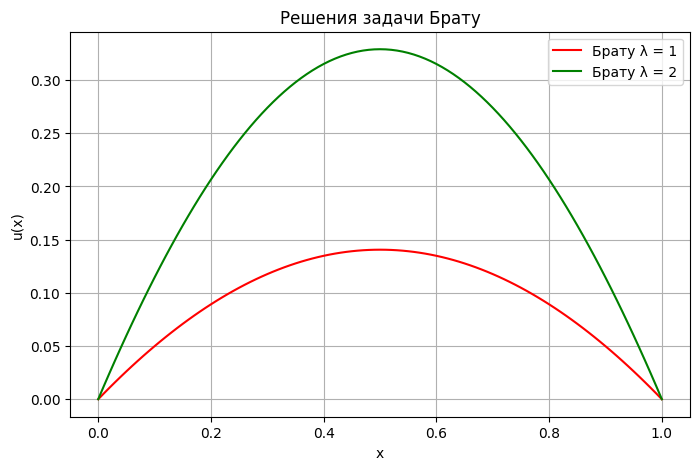

In [11]:
time_steps = np.linspace(0, 1, 101)

lam1, lam2 = 1, 2

y0_guess = np.array([1.0, -1.0])

sol_bratu1, params_bratu1 = newton(time_steps, y0_guess, bratu_system, lam1, bc, rk4)
sol_bratu2, params_bratu2 = newton(time_steps, y0_guess, bratu_system, lam2, bc, rk4)

plt.figure(figsize=(8, 5))
plt.plot(time_steps, sol_bratu1[:,0], color='red', label='Брату λ = 1')
plt.plot(time_steps, sol_bratu2[:,0], color='green', label='Брату λ = 2')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решения задачи Брату')
plt.legend()
plt.grid(True)
plt.show()